# Stock Market Analysis

In [2]:
# This analysis consists of looking at data from the stock market.
# I'm gonna look specifically into technology stocks.

# By looking at the data, that are some questions that I came up with:

# 1. What is the change in price of the stock over time?
# 2. What is the daily return of the stock on average?
# 3. What is the moving average of the various stocks?
# 4.1. What is the correlation between different stocks' closing prices?
# 4.2. What is the correlation between different stocks' daily returns?
# 5. How much value is at risk if we invest in a particular stock?
# 6. How can we attempt to predict future stock behavior?

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
from pandas_datareader import DataReader

In [7]:
from datetime import datetime

In [8]:
from __future__ import division

In [10]:
# This is a tech list of the big companies: Apple, Google, Microsoft, and Amazon

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [11]:
end = datetime.now()

start = datetime(end.year-1, end.month, end.day)

In [12]:
# This is a for loop for grabbing some financial data and setting it as a Dataframe

for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [15]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,224.006601,220.256658,221.914901,222.334822,2.761421e+07,221.299459
std,41.617446,41.062419,41.272749,41.502603,9.810064e+06,42.139167
min,170.660004,167.279999,167.410004,169.429993,8.483005e+06,167.637878
25%,196.330002,192.580002,193.949997,194.149994,2.092930e+07,192.836166
50%,208.550003,204.220001,206.830002,207.160004,2.588170e+07,205.817734
75%,255.929993,249.160004,249.539993,255.820007,3.201060e+07,255.054260
max,327.850006,321.380005,324.450012,324.339996,6.928140e+07,324.339996


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-02-04 to 2020-02-04
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


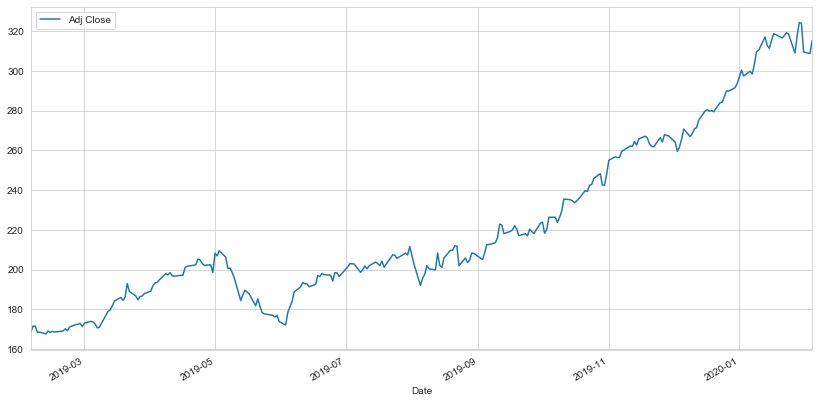

In [18]:
AAPL['Adj Close'].plot(legend=True, figsize=(14,7))

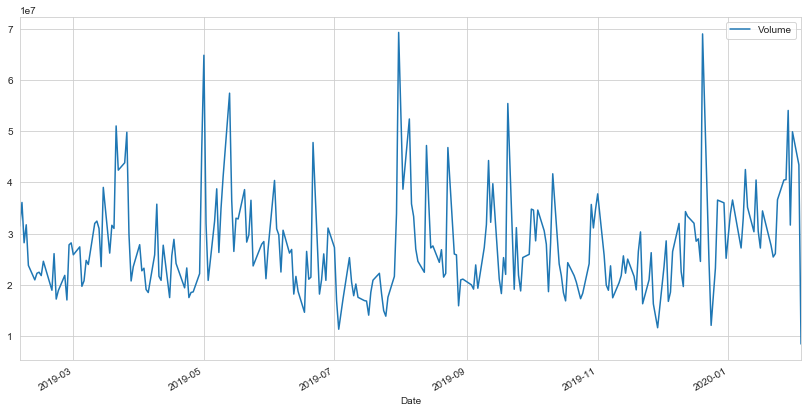

In [19]:
AAPL['Volume'].plot(legend=True, figsize=(14,7))

In [21]:
# Now let's calculate the moving average for the stock

In [23]:
# Calculating 3 different moving averages: 10 days, 20 days, and 50 days

ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

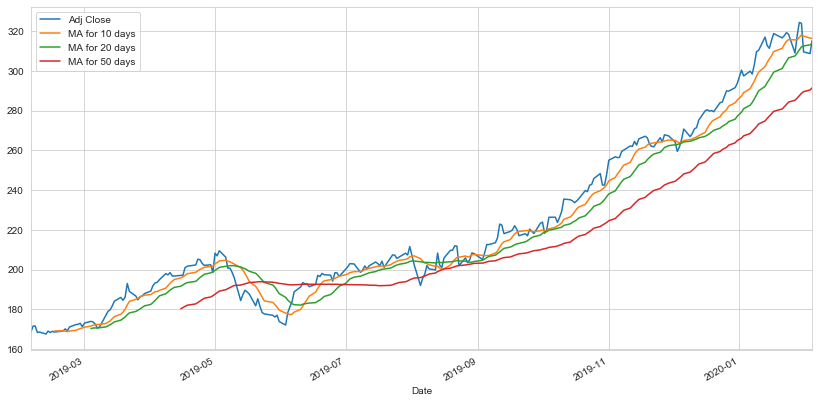

In [25]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(14,7))

In [26]:
# If we get a moving average for more days at a time, we get a smoother line, and it's not gonna rely much on the daily
# fluctuation changes.

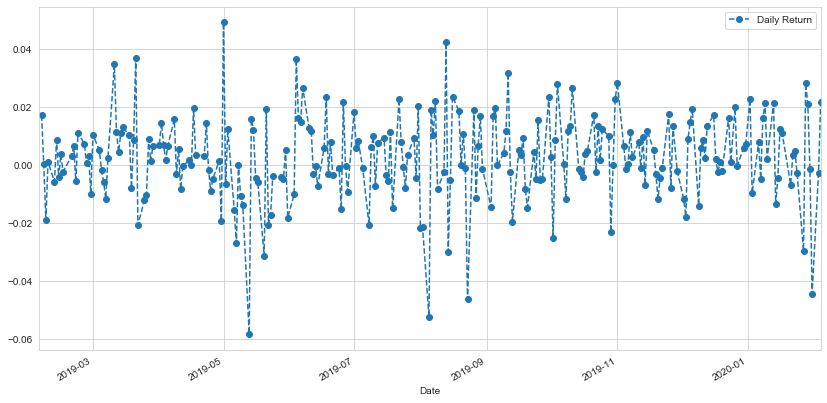

In [28]:
# Now retrieving the daily returns for Apple
# What that means is: for any given day, what is your percent return on your money?

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(14,7), legend=True, linestyle='--', marker='o')

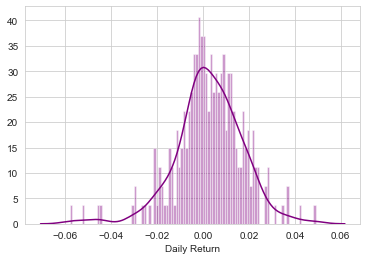

In [31]:
# This is a histogram of the daily returns for the past year.

sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

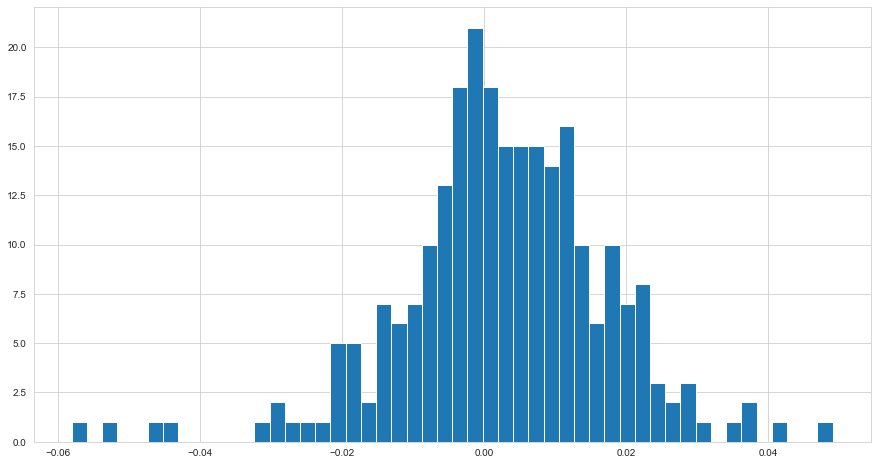

In [102]:
# It looks like the above histogram is skewed a little more negatively, but we need to do some more analysis to check
# that out.
# The following graph is just another way to see it.

AAPL['Daily Return'].hist(bins=50)
plt.gcf().set_size_inches(15, 8)

In [34]:
# Now building up another Dataframe with all the adjusted close columns for each of the stocks Dataframes in order to 
# analyse the return of all the stocks in our data list.

closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [35]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-04,168.715042,1132.800049,104.199295,1633.310059
2019-02-05,171.601685,1145.989990,105.657745,1658.810059
2019-02-06,171.660797,1115.229980,104.485077,1640.260010
2019-02-07,168.409653,1098.709961,103.736145,1614.369995
2019-02-08,168.607529,1095.060059,104.130325,1588.219971


In [36]:
tech_returns = closing_df.pct_change()

In [37]:
tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-04,NaN,NaN,NaN,NaN
2019-02-05,0.017110,0.011644,0.013997,0.015612
2019-02-06,0.000344,-0.026841,-0.011099,-0.011183
2019-02-07,-0.018939,-0.014813,-0.007168,-0.015784
2019-02-08,0.001175,-0.003322,0.003800,-0.016198


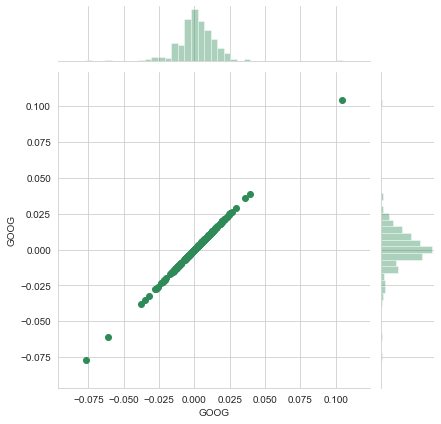

In [38]:
# Now let's compare google to itself

sns.jointplot('GOOG', 'GOOG', tech_returns, kind='scatter', color='seagreen')

In [39]:
# That's a perfect linear relationship, and that makes sense, since we are comparing google to google.

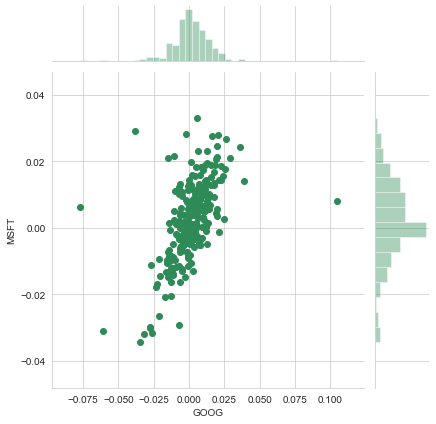

In [44]:
# Now let's check if there are relationships between different tech stocks

sns.jointplot('GOOG', 'MSFT', tech_returns, kind='scatter', color='seagreen')

In [47]:
# Now let's do some plots that will make it easy to compare the tech stocks on our list

tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-04,NaN,NaN,NaN,NaN
2019-02-05,0.017110,0.011644,0.013997,0.015612
2019-02-06,0.000344,-0.026841,-0.011099,-0.011183
2019-02-07,-0.018939,-0.014813,-0.007168,-0.015784
2019-02-08,0.001175,-0.003322,0.003800,-0.016198


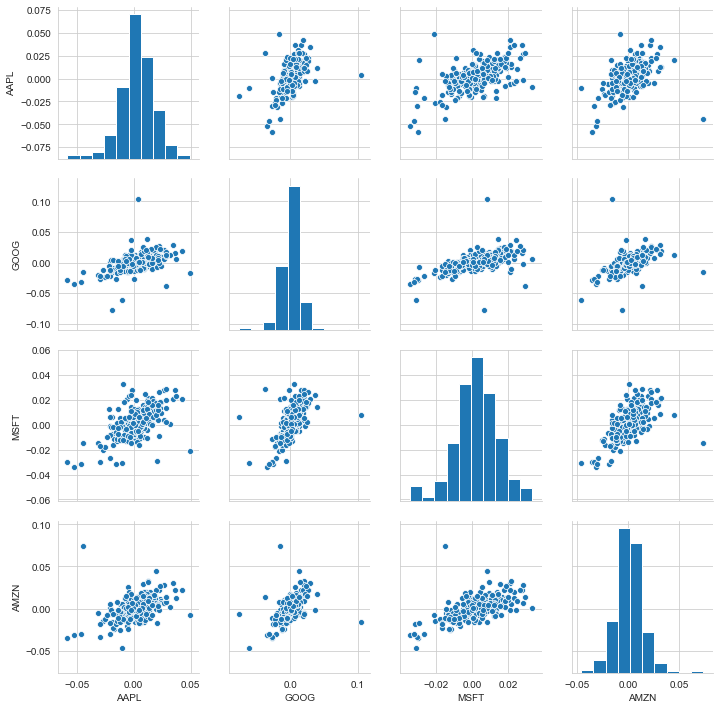

In [53]:
sns.pairplot(tech_returns.dropna())

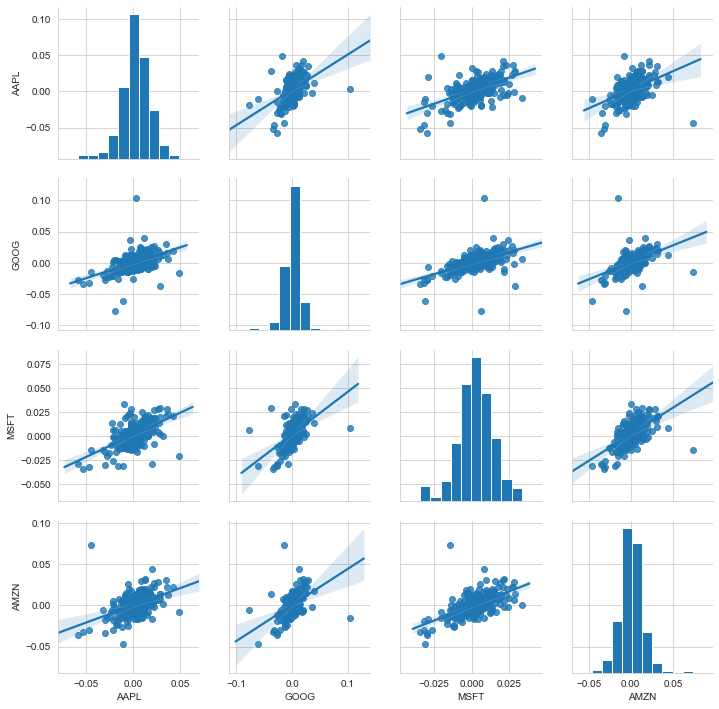

In [54]:
sns.pairplot(tech_returns.dropna(), kind="reg")

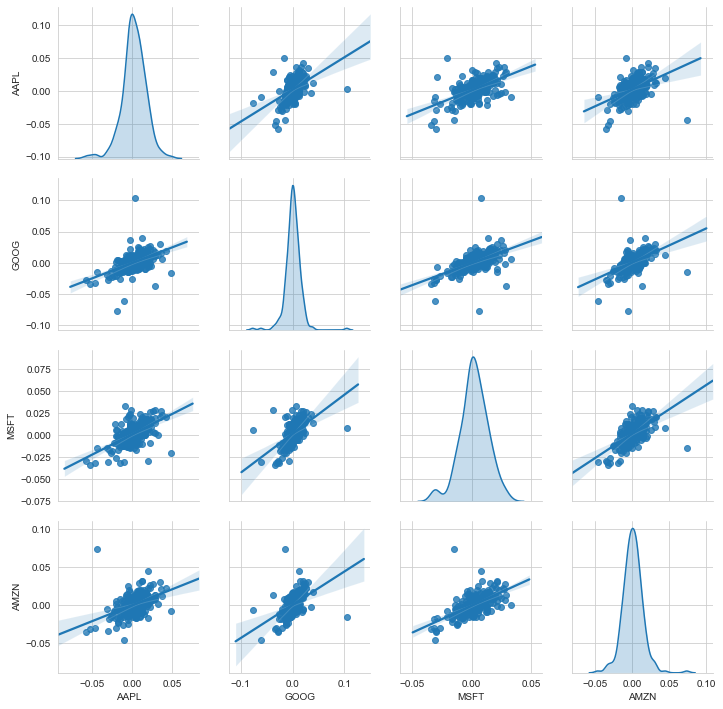

In [55]:
sns.pairplot(tech_returns.dropna(), kind="reg", diag_kind='kde')

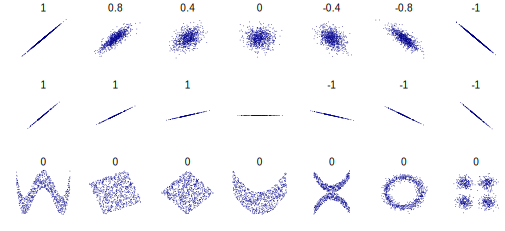

In [63]:
# Just so we can have an idea on how to interpret these graphs:

from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [64]:
# The above visualizations show a an interesting correlation between Google and Amazon daily returns
# We can dig a little deeper and use a PairGrid to see a more detailed and controled plot between those two.

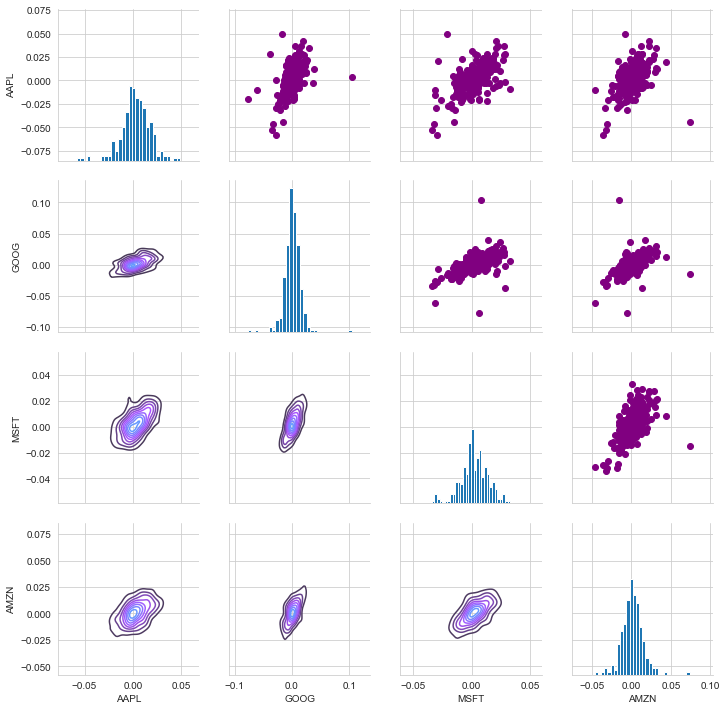

In [56]:
returns_fig = sns.PairGrid(tech_returns.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

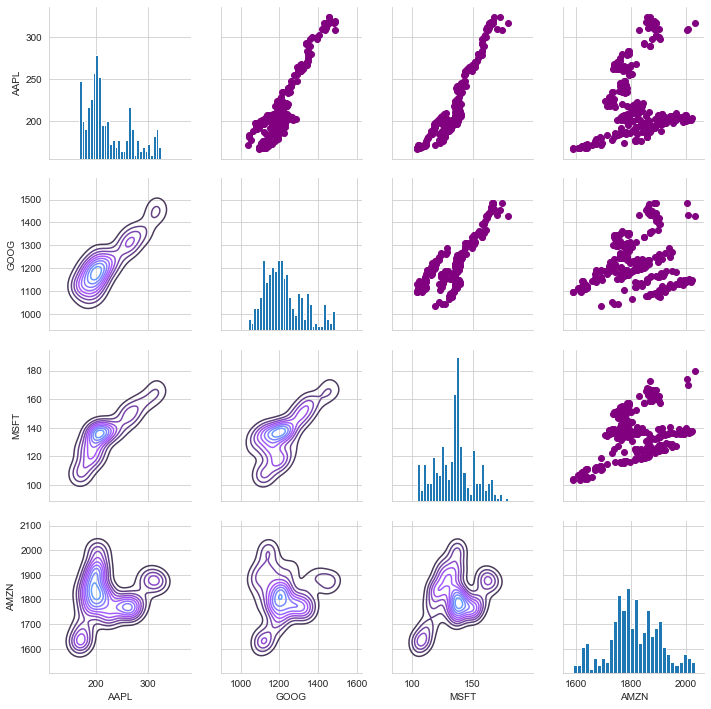

In [57]:
# Now, correlations between the closing prices

returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

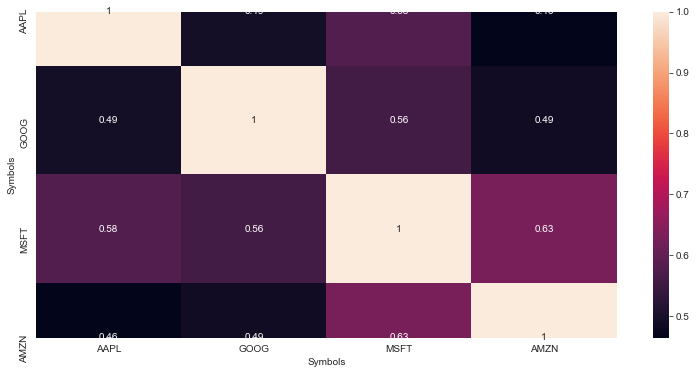

In [105]:
# The above plot shows us an interesting correlation betweenMicrosoft and Apple.
# Let's see a correlation plot for the daily returns

sns.heatmap(tech_returns.dropna().corr(), annot=True)
plt.gcf().set_size_inches(13, 6)

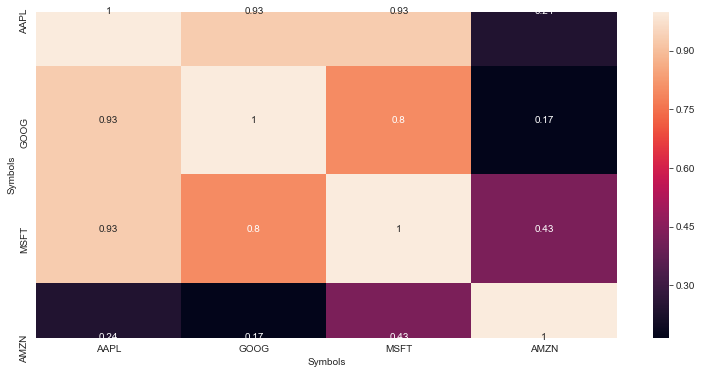

In [104]:
sns.heatmap(closing_df.dropna().corr(), annot=True)
plt.gcf().set_size_inches(13, 6)

In [65]:
# By looking at all the built visualizations, we can conclude that all the big tech companies considered are correlated somehow.
# We can also conclude that there is a strong correlation of daily stock return between Amazon and Google.

In [66]:
# Let's see how we can quantify risk

In [67]:
# There are many ways of doing that, but I will use the information gathered on daily percentage returns and compare
# the expected return with the standard deviation of the daily returns.

In [68]:
rets = tech_returns.dropna()

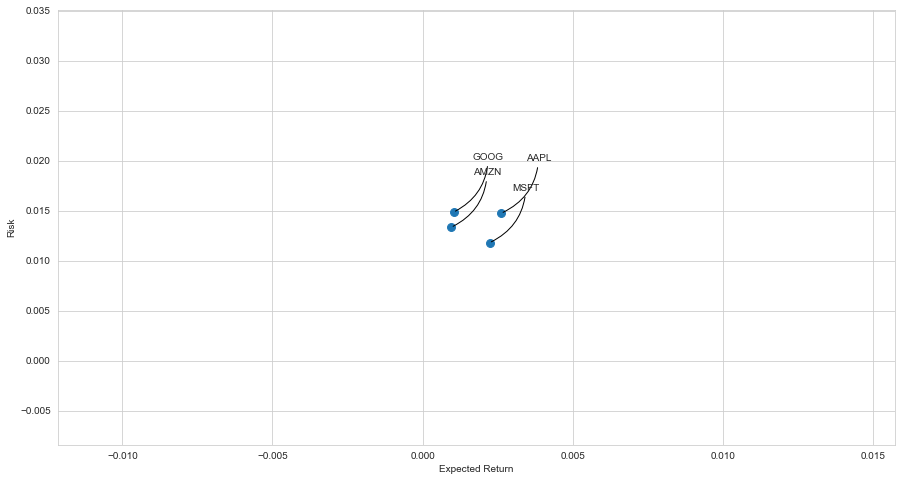

In [101]:
area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy = (x,y), xytext = (50,50),
                textcoords = 'offset points', ha = 'right', va= 'bottom',
                arrowprops = dict(arrowstyle = '-', color = 'black', connectionstyle = 'arc3,rad=-0.3'))

plt.gcf().set_size_inches(15, 8)

In [72]:
# We want a strong expect return with a lower risk.
# Based on the graph I would choose Microsoft. It has almost the same expected return as Apple (the highest one), but
# it would have a considerable lower risk. 

In [73]:
# Now, let's take a look at value at risk (the amount of money we would expect to lose for a given confidence interval).

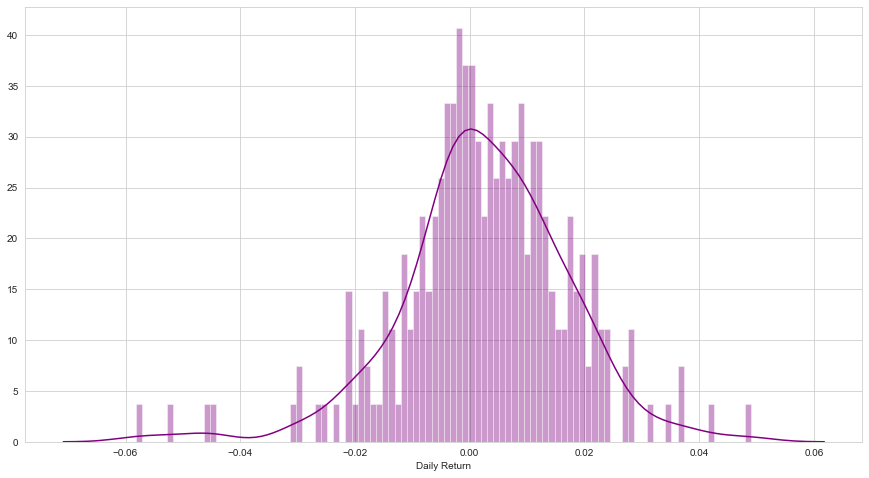

In [98]:
# This is the histogram about Apple Daily Returns

sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color='purple')
plt.gcf().set_size_inches(15, 8)

In [75]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-02-05,0.017110,0.011644,0.013997,0.015612
2019-02-06,0.000344,-0.026841,-0.011099,-0.011183
2019-02-07,-0.018939,-0.014813,-0.007168,-0.015784
2019-02-08,0.001175,-0.003322,0.003800,-0.016198
2019-02-11,-0.005751,-0.000046,-0.003975,0.001750


In [76]:
rets['AAPL'].quantile(0.05)

-0.020656430977620002

In [77]:
# This means with 95% confidence, or 95% of the simulations made with this, the worst
# daily loss would not exceed 2.07%.

In [78]:
# There is another way to quantify value at risk, which is by using the Monte Carlo method.
# The method consists on running many trials with random market conditions, then calculating portfolio losses for each trial.
# After that, we can use aggregation on all these simulations to stablish how risky the stock is.

In [79]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [92]:
def stock_monte_carlo(start_price, days, mu, sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [86]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-02-04,1132.800049,1109.020020,1112.660034,1132.800049,2576500,1132.800049
2019-02-05,1146.849976,1117.248047,1124.839966,1145.989990,3552200,1145.989990
2019-02-06,1147.000000,1112.770020,1139.569946,1115.229980,2105600,1115.229980
2019-02-07,1104.839966,1086.000000,1104.160034,1098.709961,2044800,1098.709961
2019-02-08,1098.910034,1086.550049,1087.000000,1095.060059,1075800,1095.060059


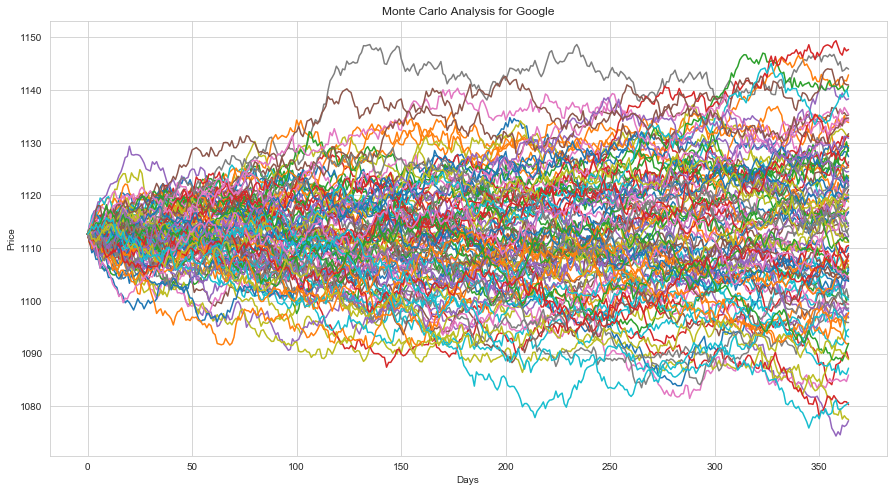

In [97]:
# We can use the first opening price (1112.66) as the start_price

start_price = 1112.66

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')
plt.gcf().set_size_inches(15, 8)

In [93]:
# Now running a 1000 times and getting an array of the end points

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

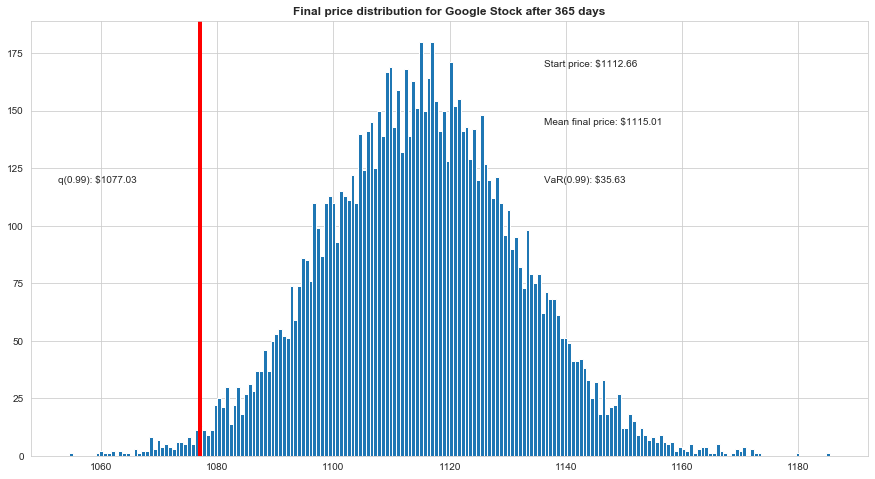

In [96]:
# Now we'll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

# Making the plot bigger
plt.gcf().set_size_inches(15, 8)

In [106]:
# So, the value at risk is $35.63. This is means that, 99% of the time we run this MOnte Carlo simulation, 
# the amount of money we would lose at most is $35.63. It doesn't look like a huge risk, given the initial investment ($1112.66).